In [42]:
library(ggplot2)
library('raster')
library(agricolae)
library(ggradar)
library(tidyr)
library(ggpubr)

### Sampling locations

In [2]:
df = read.csv('C:/Users/gcson/OneDrive - Washington State University (email.wsu.edu)/Desktop/SoilFingerPrints/Data/SamplingLocations/SamplingLocations.csv')

In [3]:
str(df)

'data.frame':	22 obs. of  20 variables:
 $ ID            : int  1 2 4 5 6 7 8 9 10 11 ...
 $ Label         : Factor w/ 22 levels "0-0-1-2","0-0-2-1",..: 12 1 13 2 3 14 10 21 4 5 ...
 $ Location      : Factor w/ 2 levels "Columbia Basin",..: 1 1 1 1 1 1 2 2 1 1 ...
 $ Pair          : int  1 1 2 2 3 3 4 4 5 6 ...
 $ FieldID       : Factor w/ 22 levels "106","1201","1209",..: 2 3 1 12 21 18 20 19 8 9 ...
 $ lat           : num  46.3 46.3 47.1 47.1 47 ...
 $ long          : num  -119 -119 -120 -120 -120 ...
 $ FieldType     : Factor w/ 2 levels "Non-virgin field",..: 1 2 1 2 2 1 2 1 2 2 ...
 $ FieldHistory  : Factor w/ 15 levels "","15+ potato crops",..: 2 1 8 6 14 15 10 7 4 4 ...
 $ Source        : Factor w/ 9 levels "Allen Horning",..: 2 2 1 1 8 8 3 3 7 7 ...
 $ Contact       : Factor w/ 6 levels "","509-398-1613",..: 5 5 4 4 2 3 1 1 6 6 ...
 $ SamplingYear  : int  2021 2021 2021 2021 2021 2021 2021 2021 2021 2021 ...
 $ Notes         : Factor w/ 6 levels "","Barley planted but not emerg

In [4]:
unique(df$FieldType)

[1] Non-virgin field Virgin field    
Levels: Non-virgin field Virgin field

In [5]:
df[df$FieldType == 'Virgin field',]

,ID,Label,Location,Pair,FieldID,lat,long,FieldType,FieldHistory,Source,Contact,SamplingYear,Notes,SoilOrder,SoilGreatgroup,SoilSubgroup,SoilFamily,SoilSeries,latitude,longitude
2,2,0-0-1-2,Columbia Basin,1,1209,46.28129,-118.6848,Virgin field,,Blaine Meek,bmeek@agrinw.com,2021,,Mollisols,Haploxerolls,Calcidic Haploxerolls,...mesic Calcidic Haploxerolls,Ritzville,"46°16'52.63""N","118°41'5.14""W"
4,5,0-0-2-1,Columbia Basin,2,HB2,47.07672,-119.8030,Virgin field,Double cropped peas/sweetcorn in 2020 followed by potato in 2021. Field was sagebrush prior to that,Allen Horning,allen@horningfarms.net,2021,,Entisols,Torripsamments,Xeric Torripsamments,...Xeric Torripsamments,Quincy,"47° 4'35.76""N","119°48'10.80""W"
5,6,0-0-3-5,Columbia Basin,3,V,47.04543,-119.6095,Virgin field,out of sage brush within past couple years,Wes Boorman,509-398-1613,2021,will be planted by 4/16,Entisols,Torripsamments,Xeric Torripsamments,...Xeric Torripsamments,Quincy,"47° 2'43.55""N","119°36'34.30""W"
7,8,0-1-4-2,Skagit Valley,4,Skagit virgin 1,48.43820,-122.4225,Virgin field,Hasn't had potatoes in 30 years,Brock Ingman,,2021,Planted a few days prior to sampling,Entisols,Fluvents,Aquic Xerofluvents,...mesic Aquic Xerofluvents,Field,,
9,10,0-0-5-4,Columbia Basin,5,983,45.69725,-119.3547,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
10,11,0-0-6-5,Columbia Basin,6,989,45.67176,-119.3470,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
11,12,0-0-7-6,Columbia Basin,7,990,45.66557,-119.3518,Virgin field,2017/2018:NoCrop - 2019: S W W Wheat - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
12,13,0-0-8-3,Columbia Basin,8,991,45.65722,-119.3468,Virgin field,2017/2018/2019:NoCrop - 2020: Grain Corn,Michael Madsen,mmadsen@agrinw.com,2021,,,,,,,,
17,18,0-1-9-3,Skagit Valley,9,Morrison - virgin,48.20852,-122.3375,Virgin field,"Hasn't had potatoes before, currently planted in potatoes",Darrin Morrison,,2021,planted in potatoes,,,,,,,
19,20,0-1-10-1,Skagit Valley,10,WSU NWREC LTARE Potato Plots,48.43992,-122.3938,Virgin field,"No history of potatoes, diverse long term history across field, 2019: Ryegrass 2020: Ryegrass?",WSU NWREC,,2021,Potatoes planted but not emerged,,,,,,,


In [7]:
state_list    <- c('California', 'Nevada', 'Utah', 'Wyoming', 'Montana', 'Idaho', 'Oregon', 'Washington')
province_list <- c("British Columbia", "Alberta")
us <- getData("GADM",country="USA",level=1)
canada <- getData("GADM",country="CAN",level=1)
us.states <- us[us$NAME_1 %in% state_list,]
ca.provinces <- canada[canada$NAME_1 %in% province_list,]

Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons
Regions defined for each Polygons


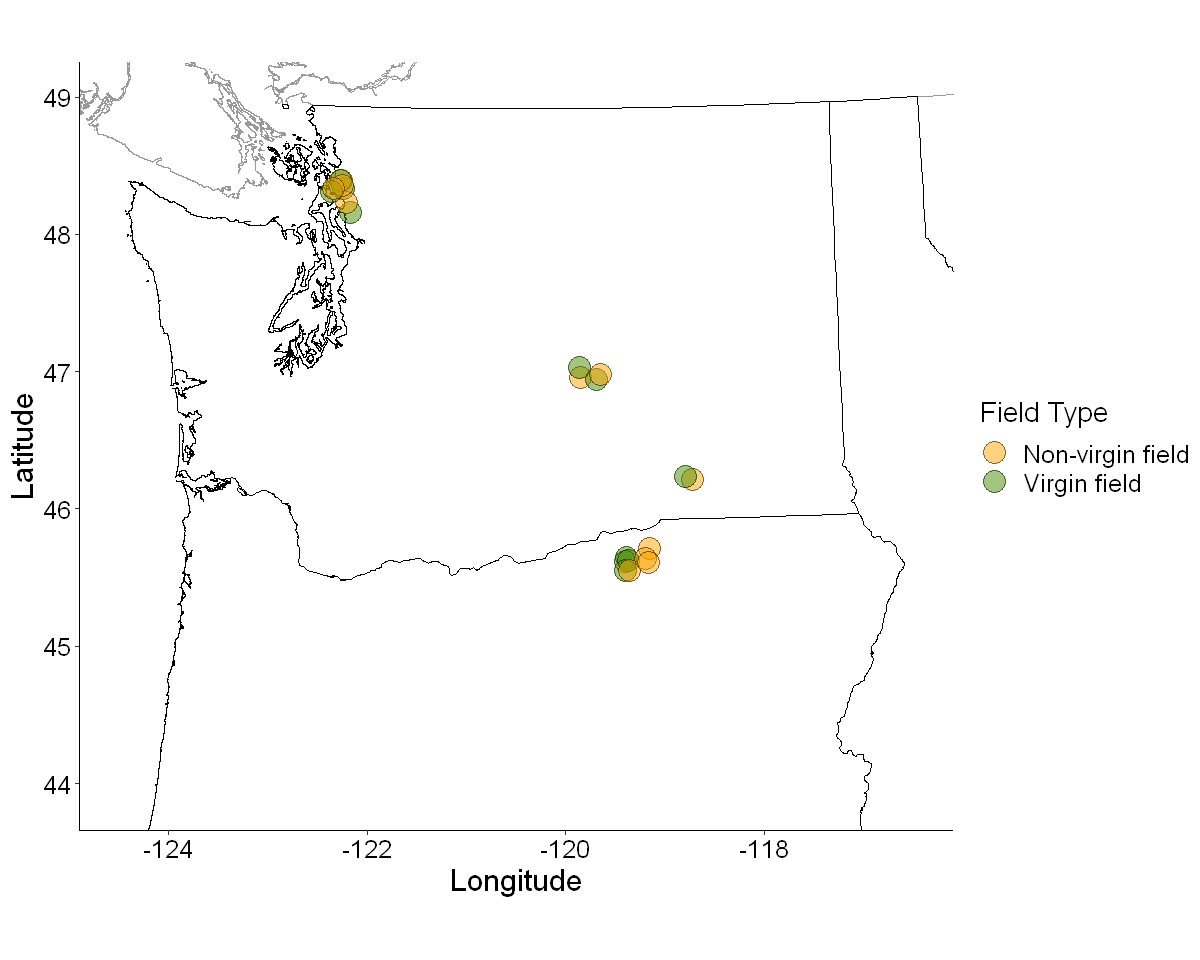

In [8]:
options(repr.plot.width=10, repr.plot.height=8)
#jpeg('Map_soilprints.jpg',width=10,height=8,units='in',res=300)
Map = ggplot(us.states,aes(x=long,y=lat, group = group))+
geom_path(size = 0.25)+
geom_path(data=ca.provinces, size = 0.25, color = 'grey60')+
geom_path(data=subset(us.states, NAME_1 %in% c('Montana', 'California','Nevada','Utah','Wyoming')),
            size=0.25,color="grey60")+
geom_polygon(data=subset(us.states, NAME_1 %in% c('Idaho', 'Oregon', 'Washington')),
               aes(x=long, y=lat, group=group), fill="white", colour = "black", size=0.50)+
theme(panel.background = element_rect(fill = "white", colour = "grey50"))+
coord_map("bonne", lat0 = 50,
    xlim = c(-124.5, -116.5),ylim = c(44, 49))+
xlab("Longitude") +
ylab("Latitude")+
geom_point(data = df, aes(x= long, y = lat,color = FieldType, fill = FieldType), position=position_jitter(h=0.05, w=0.04),shape =21, size =6, group = FALSE, alpha =0.5)+
scale_fill_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), values = c('orange', 'chartreuse4'))+
scale_colour_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'),values = c('black', 'black')) +
guides(color = guide_legend('Field Type'))+
theme_classic()+
theme(axis.title.x= element_text(size =18, color ='black'),
    axis.title.y = element_text(size =18, color ='black'),
    axis.text.x = element_text(size =15,color = 'black'),
    axis.text.y = element_text(size =15, color = 'black'),
    legend.text = element_text(size =15),
    legend.title = element_text(size =17),
    )
Map

#dev.off()

### Data

In [107]:
df = read.csv('C:/Users/gcson/OneDrive - Washington State University (email.wsu.edu)/Desktop/SoilFingerPrints/Data/SoilFingerPrintsData.csv')

In [108]:
str(df)

'data.frame':	22 obs. of  34 variables:
 $ ID                    : int  1 2 4 5 6 7 8 9 10 11 ...
 $ Label                 : Factor w/ 22 levels "0-0-1-2","0-0-2-1",..: 12 1 13 2 3 14 10 21 4 5 ...
 $ Location              : Factor w/ 2 levels "Columbia Basin",..: 1 1 1 1 1 1 2 2 1 1 ...
 $ Pair                  : int  1 1 2 2 3 3 4 4 5 6 ...
 $ FieldType             : Factor w/ 2 levels "Non-virgin field",..: 1 2 1 2 2 1 2 1 2 2 ...
 $ Block                 : int  2 2 1 1 5 5 2 2 4 5 ...
 $ Wt_Tuber.g.           : num  1587 207 1096 610 814 ...
 $ Weight_GT20           : num  1538 160 1077 610 802 ...
 $ Count_Tuber           : int  15 11 9 5 12 14 9 7 10 22 ...
 $ Count_GT20            : int  12 2 8 5 11 11 9 7 6 15 ...
 $ Sen_7.29.21           : int  10 20 5 0 0 0 10 8 15 8 ...
 $ Sen_8.4.21            : int  8 25 10 0 0 0 10 15 15 10 ...
 $ Sen_8.11.21           : int  10 20 15 0 0 2 10 15 15 15 ...
 $ Sen_8.18.21           : int  15 30 15 0 5 10 15 20 25 15 ...
 $ Sen_8.25.21     

* Change to factor

In [109]:
df[c("ID", "Pair", "FieldType","Block")] <- lapply(df[c("ID", "Pair", "FieldType", "Block")],
                                                factor)
str(df)

'data.frame':	22 obs. of  34 variables:
 $ ID                    : Factor w/ 22 levels "1","2","4","5",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ Label                 : Factor w/ 22 levels "0-0-1-2","0-0-2-1",..: 12 1 13 2 3 14 10 21 4 5 ...
 $ Location              : Factor w/ 2 levels "Columbia Basin",..: 1 1 1 1 1 1 2 2 1 1 ...
 $ Pair                  : Factor w/ 11 levels "1","2","3","4",..: 1 1 2 2 3 3 4 4 5 6 ...
 $ FieldType             : Factor w/ 2 levels "Non-virgin field",..: 1 2 1 2 2 1 2 1 2 2 ...
 $ Block                 : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 1 5 5 2 2 4 5 ...
 $ Wt_Tuber.g.           : num  1587 207 1096 610 814 ...
 $ Weight_GT20           : num  1538 160 1077 610 802 ...
 $ Count_Tuber           : int  15 11 9 5 12 14 9 7 10 22 ...
 $ Count_GT20            : int  12 2 8 5 11 11 9 7 6 15 ...
 $ Sen_7.29.21           : int  10 20 5 0 0 0 10 8 15 8 ...
 $ Sen_8.4.21            : int  8 25 10 0 0 0 10 15 15 10 ...
 $ Sen_8.11.21           : int  10 20 15 0 

In [110]:
df1 = df[, c(1, 3, 4:18, 20, 22, 23,24,26:32, 34)]
head(df1)

ID,Location,Pair,FieldType,Block,Wt_Tuber.g.,Weight_GT20,Count_Tuber,Count_GT20,Sen_7.29.21,...,BD_Stem,Vd_Stem,Pyth_Avg_Soil,ResPyth_Avg_Soil,ResPyth_Per_Soil,ResPyth_binary,Fus_Avg_Soil,Vd_Tot_Soil,BD_Tot_Soil,POXC
1,Columbia Basin,1,Non-virgin field,2,1586.65,1537.88,15,12,10,...,0,0,11,0,0,0,110,0,0,177.7824
2,Columbia Basin,1,Virgin field,2,207.26,160.03,11,2,20,...,0,0,56,45,80,1,613,0,0,281.7720
4,Columbia Basin,2,Non-virgin field,1,1096.27,1077.21,9,8,5,...,0,0,109,22,20,1,709,0,0,364.1400
5,Columbia Basin,2,Virgin field,1,610.05,610.50,5,5,0,...,0,0,60,33,55,1,110,0,0,189.1080
6,Columbia Basin,3,Virgin field,5,814.12,801.73,12,11,0,...,0,0,157,29,19,1,1668,2,0,315.7488
7,Columbia Basin,3,Non-virgin field,5,1038.14,1009.35,14,11,0,...,0,0,0,0,0,0,650,0,0,267.3576


In [111]:
lapply(df, unique)

$ID
 [1] 1  2  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22 23
Levels: 1 2 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

$Label
 [1] 1-0-1-2  0-0-1-2  1-0-2-1  0-0-2-1  0-0-3-5  1-0-3-5  0-1-4-2  1-1-4-2 
 [9] 0-0-5-4  0-0-6-5  0-0-7-6  0-0-8-3  1-0-5-4  1-0-6-5  1-0-7-6  1-0-8-3 
[17] 0-1-9-3  1-1-9-3  0-1-10-1 1-1-10-1 0-1-11-4 1-1-11-4
22 Levels: 0-0-1-2 0-0-2-1 0-0-3-5 0-0-5-4 0-0-6-5 0-0-7-6 0-0-8-3 ... 1-1-9-3

$Location
[1] Columbia Basin Skagit Valley 
Levels: Columbia Basin Skagit Valley

$Pair
 [1] 1  2  3  4  5  6  7  8  9  10 11
Levels: 1 2 3 4 5 6 7 8 9 10 11

$FieldType
[1] Non-virgin field Virgin field    
Levels: Non-virgin field Virgin field

$Block
[1] 2 1 5 4 6 3
Levels: 1 2 3 4 5 6

$Wt_Tuber.g.
 [1] 1586.65  207.26 1096.27  610.05  814.12 1038.14 1378.06  859.18  394.53
[10] 1546.06 1300.45  566.92  929.24  617.91  662.00  698.16 1162.44  510.10
[19] 1100.35 1042.63 1034.51  934.47

$Weight_GT20
 [1] 1537.88  160.03 1077.21  610.50  801.73 1009.35 1378.06  859.18  327.56
[10] 1451.85 1247.21  557.47  991.91  665.87  624.84  694.08 1033.32  457.23
[19] 1027.70 1003.21  982.02  766.50

$Count_Tuber
 [1] 15 11  9  5 12 14  7 10 22 16 13  8 26 17 21 29

$Count_GT20
 [1] 12  2  8  5 11  9  7  6 15 10 16

$Sen_7.29.21
[1] 10 20  5  0  8 15

$Sen_8.4.21
[1]  8 25 10  0 15  2

$Sen_8.11.21
[1] 10 20 15  0  2  5  8

$Sen_8.18.21
[1] 15 30  0  5 10 20 25

$Sen_8.25.21
[1] 10 30  8  0  5 35 15

$Sen_9.1.21
[1] 15 40  0 10 35 25  5 20

$Sen_9.8.21
 [1]  30  40  35   2   5  10  50  15 100   0  20  25

$Sen_9.23.21
 [1]  40  50  70   5  10  35  45  15  20 100  30  80

$BD_count_Tuber
 [1] 0/9   0/3   0/6   0/5   0/10  0/8   6-Mar 0/11  7-Jan 0/7   4-Jan 9-Jan
Levels: 0/10 0/11 0/3 0/5 0/6 0/7 0/8 0/9 4-Jan 6-Mar 7-Jan 9-Jan

$BD_Per_Tuber
[1]  0.00 50.00 14.29 25.00 11.11

$Vd_count_Tuber
 [1] 0/9    0/3    0/6    0/5    10-Jan 8-Jan  0/11   0/8    0/7    4-Jan 
[11] 0/10  
Levels: 0/10 0/11 0/3 0/5 0/6 0/7 0/8 0/9 10-Jan 4-Jan 8-Jan

$Vd_Per_Tuber
[1]  0.0 10.0 12.5 25.0

$BD_Stem
[1] 0

$Vd_Stem
[1] 0.0 0.6

$DESCRIPTION..Study.ID.
 [1]  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

$Pyth_Avg_Soil
 [1]  11  56 109  60 157   0 179 223   5  80  22  21  53  94  27 343  99 276  82
[20] 234

$ResPyth_Avg_Soil
[1]  0 45 22 33 29  6  5 11

$ResPyth_Per_Soil
 [1]   0  80  20  55  19   3 100  13  25   6

$ResPyth_binary
[1] 0 1

$Fus_Avg_Soil
 [1]  110  613  709 1668  650  774  351  272  161  908   54  267  963 1724  428
[16] 1278  697 2703 1286 1318  858

$Vd_Tot_Soil
[1] 0 2 6 4

$BD_Tot_Soil
[1] 0 2

$Sample.ID
 [1]  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23

$POXC
 [1] 177.7824 281.7720 364.1400 189.1080 315.7488 267.3576 535.0536 411.5016
 [9] 208.6704 255.0024 323.9856 307.5120 270.4464 400.1760 379.5840 326.0448
[17] 822.3120 600.9480 466.0704 456.8040 597.8592 592.0632

### Microplot study

#### AUSPC

- Inspect names

In [112]:
names(df1)

[1] "ID"               "Location"         "Pair"             "FieldType"       
 [5] "Block"            "Wt_Tuber.g."      "Weight_GT20"      "Count_Tuber"     
 [9] "Count_GT20"       "Sen_7.29.21"      "Sen_8.4.21"       "Sen_8.11.21"     
[13] "Sen_8.18.21"      "Sen_8.25.21"      "Sen_9.1.21"       "Sen_9.8.21"      
[17] "Sen_9.23.21"      "BD_Per_Tuber"     "Vd_Per_Tuber"     "BD_Stem"         
[21] "Vd_Stem"          "Pyth_Avg_Soil"    "ResPyth_Avg_Soil" "ResPyth_Per_Soil"
[25] "ResPyth_binary"   "Fus_Avg_Soil"     "Vd_Tot_Soil"      "BD_Tot_Soil"     
[29] "POXC"

- Extract days of the month when data were collected

In [113]:
ts <- gsub("(?:[^.]+\\.){1}([^.]+).*", "\\1",
    names(df1)[(grepl("Sen", names(df1)))])
ts

[1] "29" "4"  "11" "18" "25" "1"  "8"  "23"

- Convert to numbers

In [114]:
ts <- as.numeric(ts)
ts

[1] 29  4 11 18 25  1  8 23

In [115]:
ts[2:5] = ts[2:5] +31
ts[6:8] = ts[6:8]+60#= ts[2]+30
ts = ts-28
ts

[1]  1  7 14 21 28 33 40 55

- Rename columns

In [116]:
names(df1)[(grepl("Sen", names(df1)))] <- ts

- Sanity check

In [117]:
head(df1)

ID,Location,Pair,FieldType,Block,Wt_Tuber.g.,Weight_GT20,Count_Tuber,Count_GT20,1,...,BD_Stem,Vd_Stem,Pyth_Avg_Soil,ResPyth_Avg_Soil,ResPyth_Per_Soil,ResPyth_binary,Fus_Avg_Soil,Vd_Tot_Soil,BD_Tot_Soil,POXC
1,Columbia Basin,1,Non-virgin field,2,1586.65,1537.88,15,12,10,...,0,0,11,0,0,0,110,0,0,177.7824
2,Columbia Basin,1,Virgin field,2,207.26,160.03,11,2,20,...,0,0,56,45,80,1,613,0,0,281.7720
4,Columbia Basin,2,Non-virgin field,1,1096.27,1077.21,9,8,5,...,0,0,109,22,20,1,709,0,0,364.1400
5,Columbia Basin,2,Virgin field,1,610.05,610.50,5,5,0,...,0,0,60,33,55,1,110,0,0,189.1080
6,Columbia Basin,3,Virgin field,5,814.12,801.73,12,11,0,...,0,0,157,29,19,1,1668,2,0,315.7488
7,Columbia Basin,3,Non-virgin field,5,1038.14,1009.35,14,11,0,...,0,0,0,0,0,0,650,0,0,267.3576


In [118]:
names(df1)

[1] "ID"               "Location"         "Pair"             "FieldType"       
 [5] "Block"            "Wt_Tuber.g."      "Weight_GT20"      "Count_Tuber"     
 [9] "Count_GT20"       "1"                "7"                "14"              
[13] "21"               "28"               "33"               "40"              
[17] "55"               "BD_Per_Tuber"     "Vd_Per_Tuber"     "BD_Stem"         
[21] "Vd_Stem"          "Pyth_Avg_Soil"    "ResPyth_Avg_Soil" "ResPyth_Per_Soil"
[25] "ResPyth_binary"   "Fus_Avg_Soil"     "Vd_Tot_Soil"      "BD_Tot_Soil"     
[29] "POXC"

In [119]:
df1$AUDPC <- audpc(df1[,9:16],ts)
head(df1)

ID,Location,Pair,FieldType,Block,Wt_Tuber.g.,Weight_GT20,Count_Tuber,Count_GT20,1,...,Vd_Stem,Pyth_Avg_Soil,ResPyth_Avg_Soil,ResPyth_Per_Soil,ResPyth_binary,Fus_Avg_Soil,Vd_Tot_Soil,BD_Tot_Soil,POXC,AUDPC
1,Columbia Basin,1,Non-virgin field,2,1586.65,1537.88,15,12,10,...,0,11,0,0,0,110,0,0,177.7824,767.0
2,Columbia Basin,1,Virgin field,2,207.26,160.03,11,2,20,...,0,56,45,80,1,613,0,0,281.7720,1551.0
4,Columbia Basin,2,Non-virgin field,1,1096.27,1077.21,9,8,5,...,0,109,22,20,1,709,0,0,364.1400,797.0
5,Columbia Basin,2,Virgin field,1,610.05,610.50,5,5,0,...,0,60,33,55,1,110,0,0,189.1080,30.0
6,Columbia Basin,3,Virgin field,5,814.12,801.73,12,11,0,...,0,157,29,19,1,1668,2,0,315.7488,240.5
7,Columbia Basin,3,Non-virgin field,5,1038.14,1009.35,14,11,0,...,0,0,0,0,0,650,0,0,267.3576,340.0


##### Plot

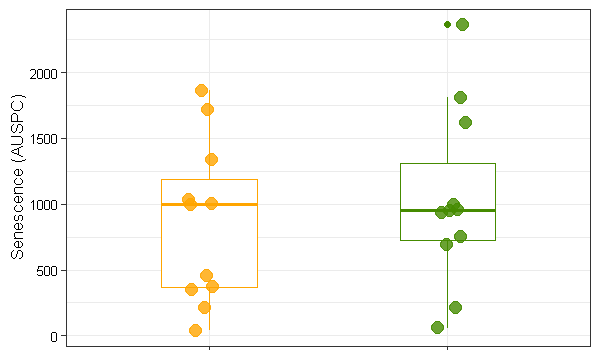

In [17]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('AUDPC_soilprints.jpg',width=5,height=3,units='in',res=300)
a = ggplot(data = df1, aes(x =FieldType, y = AUDPC, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y="Senescence (AUSPC)") +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
a
#dev.off()

##### Diagnostics

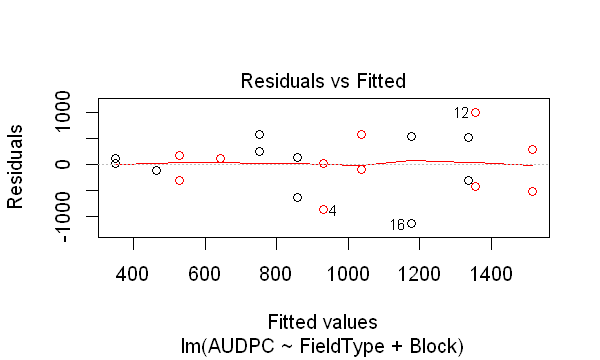

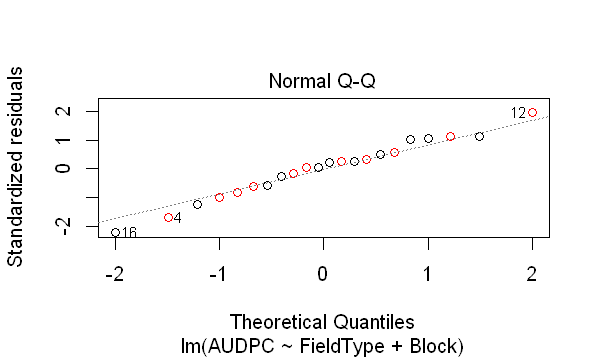

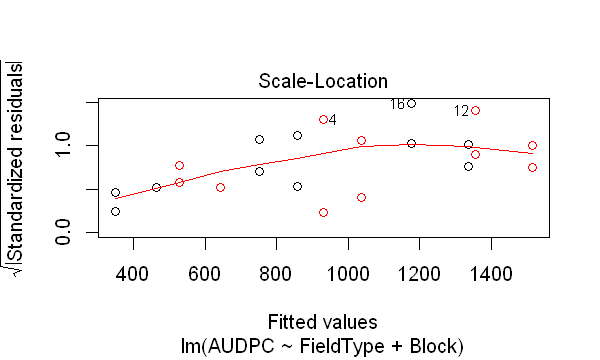

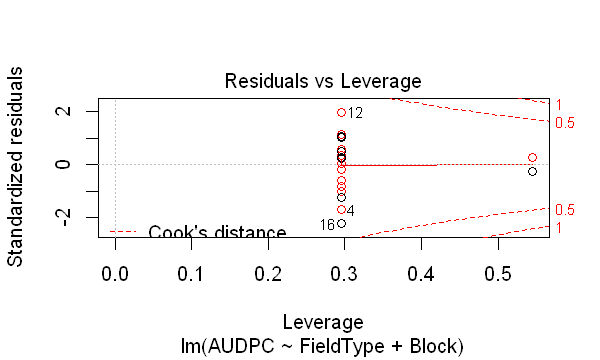

In [27]:
d <- lm(AUDPC ~ FieldType + Block, data=df1)
plot(d, col = df1$FieldType)

In [28]:
t.test(AUDPC~ FieldType, 
       paired=T, 
       data=df1)


	Paired t-test

data:  AUDPC by FieldType
t = -0.56969, df = 10, p-value = 0.5815
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -879.5398  521.3580
sample estimates:
mean of the differences 
              -179.0909 


####  Tuber weight

##### Plot

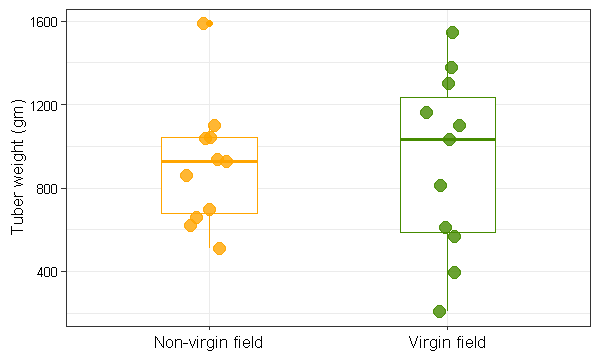

In [32]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('TuberwtAll_soilprints.jpg',width=5,height=3,units='in',res=300)
b= ggplot(data = df1, aes(x =FieldType, y = Wt_Tuber.g., color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y="Tuber weight (gm)") +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
b
#dev.off()

##### Diagnostics

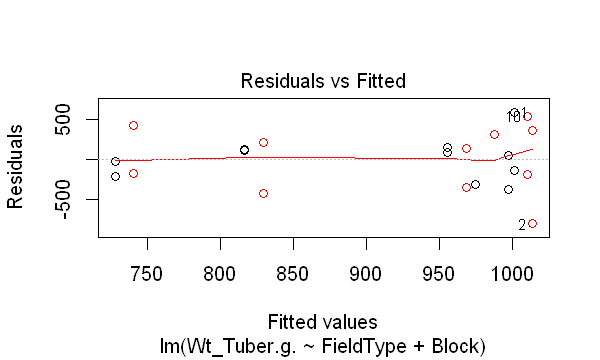

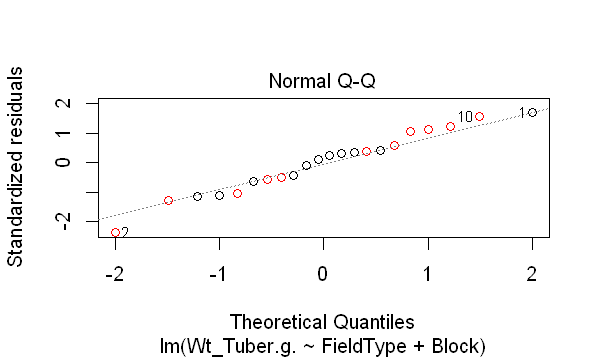

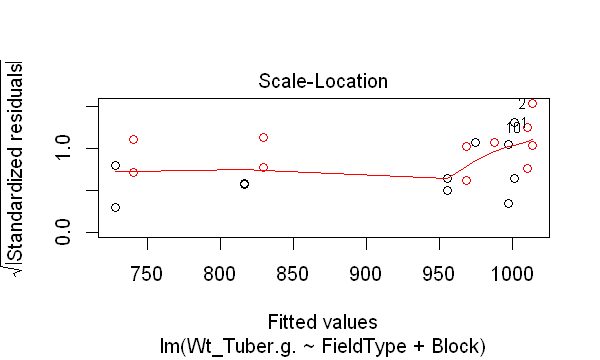

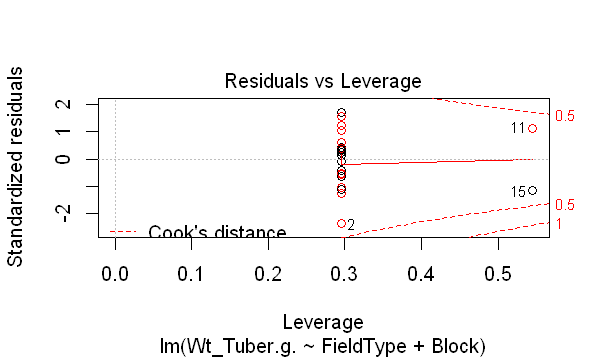

In [33]:
d <- lm(Wt_Tuber.g. ~ FieldType + Block, data=df1)
plot(d, col = df1$FieldType)

In [34]:
t.test(Wt_Tuber.g.~ FieldType, 
       paired=T, 
       data=df1)


	Paired t-test

data:  Wt_Tuber.g. by FieldType
t = -0.063151, df = 10, p-value = 0.9509
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -461.7789  436.3244
sample estimates:
mean of the differences 
              -12.72727 


#### Tuber count

##### Plot

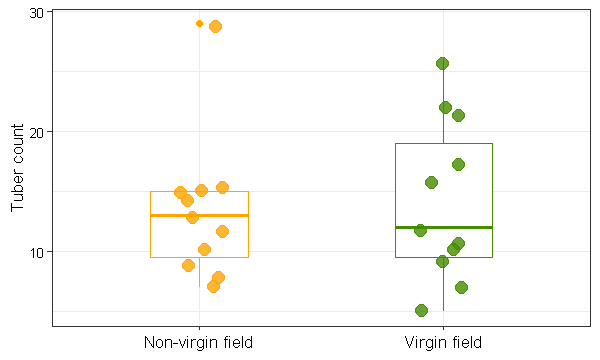

In [38]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('TuberCountAll_soilprints.jpg',width=5,height=3,units='in',res=300)
c = ggplot(data = df1, aes(x =FieldType, y = Count_Tuber, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5,position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y="Tuber count") +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
c
#dev.off()

##### Diagnostics

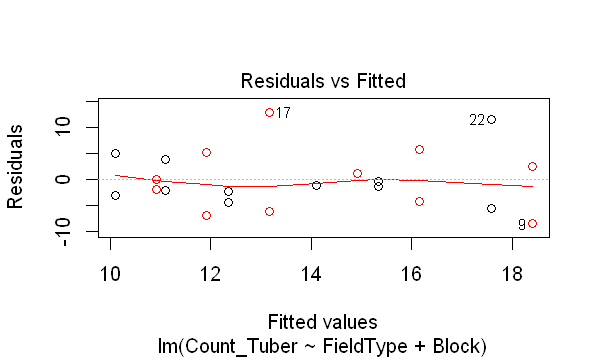

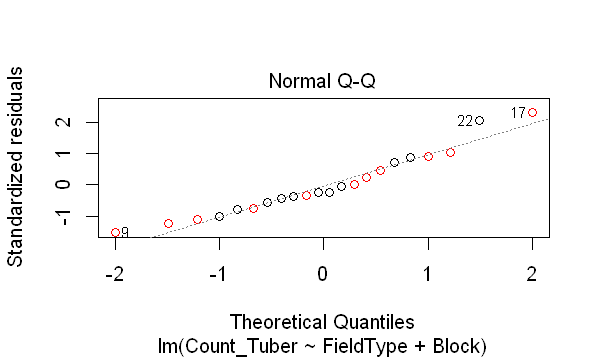

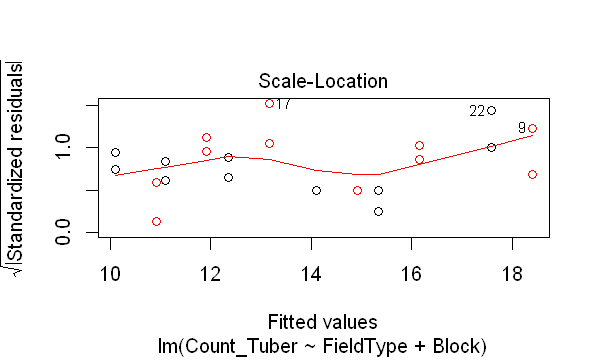

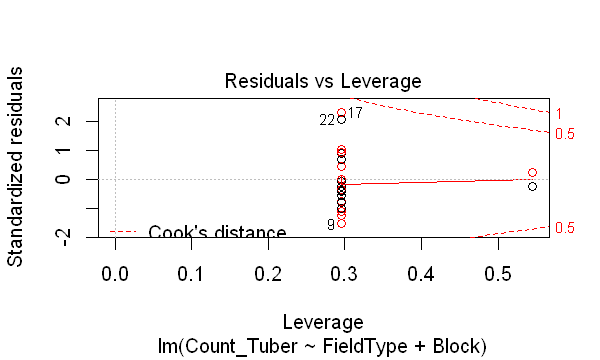

In [39]:
d <- lm(Count_Tuber ~ FieldType + Block, data=df1)
plot(d, col = df1$FieldType)

In [40]:
t.test(Count_Tuber~ FieldType, 
       paired=T, 
       data=df1)


	Paired t-test

data:  Count_Tuber by FieldType
t = -0.4189, df = 10, p-value = 0.6841
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.170117  3.533754
sample estimates:
mean of the differences 
             -0.8181818 


#### Combine plots

null device 
          1

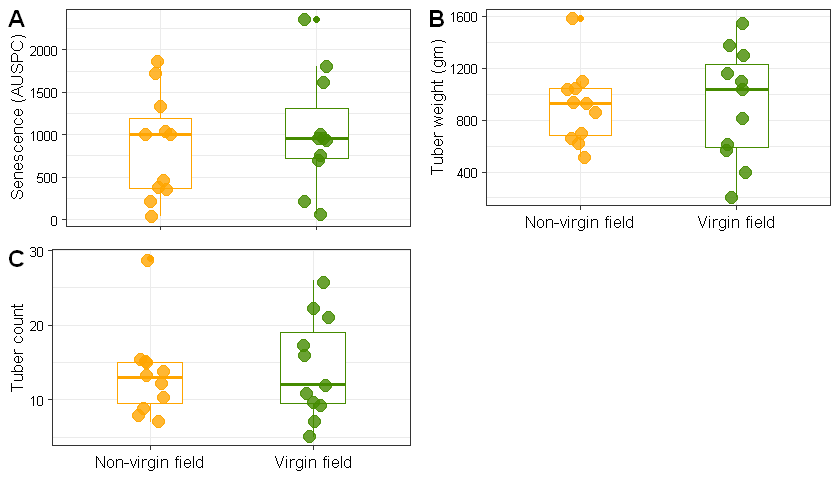

In [54]:
options(repr.plot.width = 7, repr.plot.height = 4)
#jpeg('count_wt.jpg',width=7,height=4,units='in',res=300)
plot = ggarrange(a,b,c, labels = c("A", "B", "C"), ncol = 2, nrow = 2)
plot
dev.off()

### Soil biological properties

In [41]:
names(df1)

[1] "ID"               "Pair"             "FieldType"        "Block"           
 [5] "Wt_Tuber.g."      "Weight_GT20"      "Count_Tuber"      "Count_GT20"      
 [9] "1"                "7"                "14"               "21"              
[13] "28"               "33"               "40"               "55"              
[17] "BD_Per_Tuber"     "Vd_Per_Tuber"     "BD_Stem"          "Vd_Stem"         
[21] "Pyth_Avg_Soil"    "ResPyth_Avg_Soil" "ResPyth_Per_Soil" "ResPyth_binary"  
[25] "Fus_Avg_Soil"     "Vd_Tot_Soil"      "BD_Tot_Soil"      "AUDPC"

#### Pythium 

##### Plot

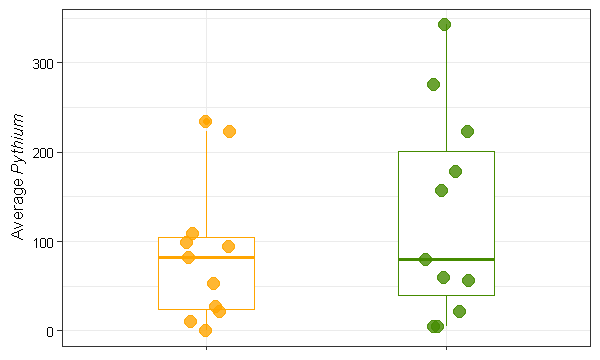

In [42]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('AUDPC_soilprints.jpg',width=5,height=3,units='in',res=300)
v = ggplot(data = df1, aes(x =FieldType, y = Pyth_Avg_Soil, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Average ",italic("Pythium")))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
v
#dev.off()

#### Resistant Pythium

##### Plot

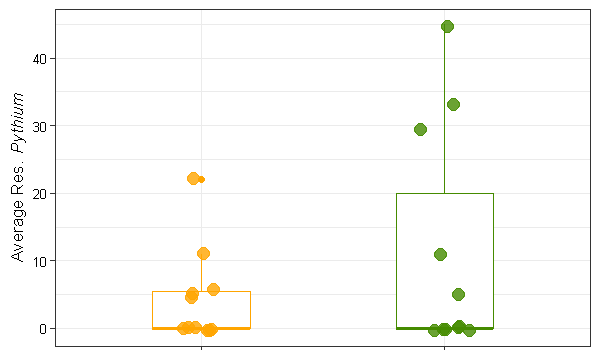

In [43]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('AUDPC_soilprints.jpg',width=5,height=3,units='in',res=300)
w = ggplot(data = df1, aes(x =FieldType, y = ResPyth_Avg_Soil, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Average Res.  ",italic("Pythium")))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
w
#dev.off()

#### Fusarium

##### Plot

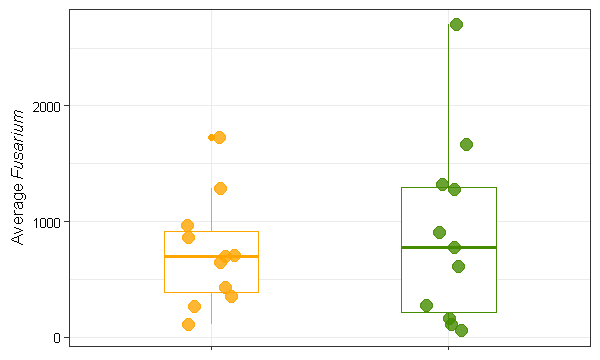

In [44]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('AUDPC_soilprints.jpg',width=5,height=3,units='in',res=300)
x = ggplot(data = df1, aes(x =FieldType, y = Fus_Avg_Soil, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Average ",italic("Fusarium")))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_blank(),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
x
#dev.off()

#### Verticillium

##### Plot

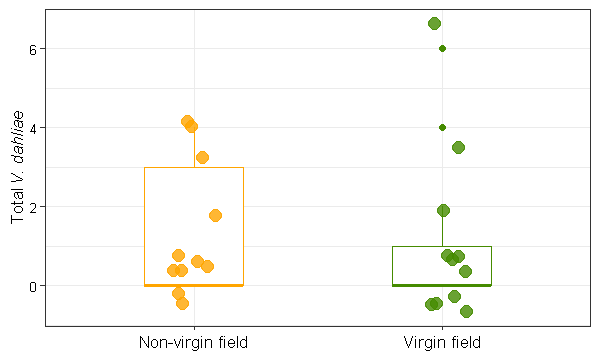

In [45]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('Vd_soilprints.jpg',width=5,height=3,units='in',res=300)
y = ggplot(data = df1, aes(x =FieldType, y = Vd_Tot_Soil, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Total ",italic("V. dahliae")))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
y
#dev.off()

#### Colletotrichum

##### Plot

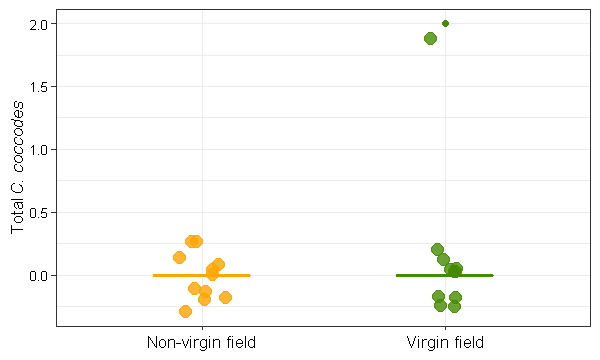

In [24]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('Vd_soilprints.jpg',width=5,height=3,units='in',res=300)
z = ggplot(data = df1, aes(x =FieldType, y = BD_Tot_Soil, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1, height = 0.3))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Total ",italic("C. coccodes")))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))
z
#dev.off()

#### Combine plots

* Soil plating

jpeg 
   3

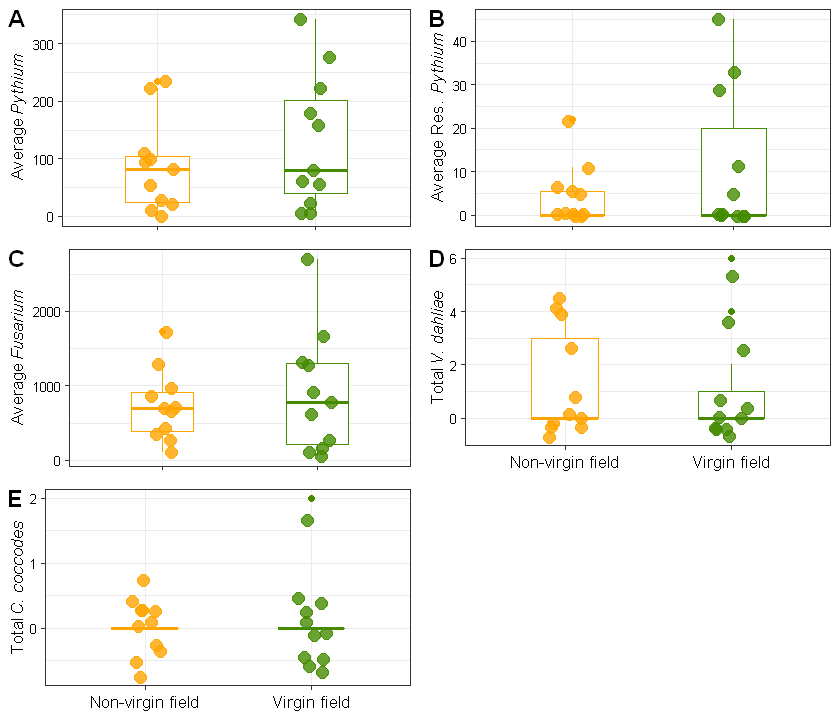

In [350]:
options(repr.plot.width = 7, repr.plot.height = 6)
#jpeg('soil_pathogens.jpg',width=7,height=6,units='in',res=300)
plot = ggarrange(v,w,x,y,z, labels = c("A", "B", "C", "D","E"), ncol = 2, nrow = 3)
plot
dev.off()

### Soil physical properties

#### Active carbon 

##### Plot

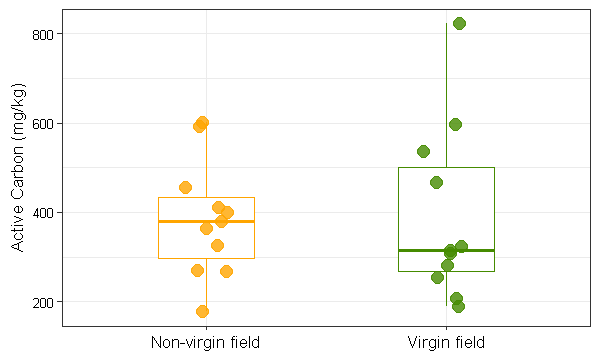

In [14]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('soilprints_carbon.jpg',width=5,height=3,units='in',res=300)
z = ggplot(data = df1, aes(x =FieldType, y = POXC, color = FieldType))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1, height = 0.3))+
    theme_bw()+
    labs(x = 'Field Type', y=expression(paste("Active Carbon (mg/kg) "))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Field Type', labels = c('Non-virgin fields', 'Virgin fields'), 
                  values = c('orange', 'chartreuse4'))
z
#dev.off()

##### Paired t-test

In [10]:
t.test(POXC~ FieldType, 
       paired=T, 
       data=df1)


	Paired t-test

data:  POXC by FieldType
t = -0.14531, df = 10, p-value = 0.8874
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -83.52153  73.29491
sample estimates:
mean of the differences 
              -5.113309 


##### plot differences

In [126]:
df2 = df1 %>% select(FieldType, Pair, POXC, Location) %>% spread(FieldType, POXC)
head(df2)

Pair,Location,Non-virgin field,Virgin field
1,Columbia Basin,177.7824,281.7720
2,Columbia Basin,364.1400,189.1080
3,Columbia Basin,267.3576,315.7488
4,Skagit Valley,411.5016,535.0536
5,Columbia Basin,270.4464,208.6704
6,Columbia Basin,400.1760,255.0024


In [127]:
df2 = rename(df2, non_virgin = `Non-virgin field`, virgin = `Virgin field`)
df2 = mutate(df2, diff = virgin - non_virgin)
df2

Pair,Location,non_virgin,virgin,diff
1,Columbia Basin,177.7824,281.7720,103.9896
2,Columbia Basin,364.1400,189.1080,-175.0320
3,Columbia Basin,267.3576,315.7488,48.3912
4,Skagit Valley,411.5016,535.0536,123.5520
5,Columbia Basin,270.4464,208.6704,-61.7760
6,Columbia Basin,400.1760,255.0024,-145.1736
7,Columbia Basin,379.5840,323.9856,-55.5984
8,Columbia Basin,326.0448,307.5120,-18.5328
9,Skagit Valley,600.9480,822.3120,221.3640
10,Skagit Valley,456.8040,466.0704,9.2664


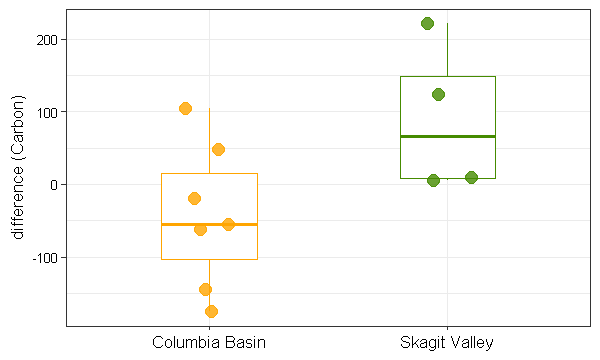

In [131]:
options(repr.plot.width = 5, repr.plot.height = 3)
#jpeg('soilprints_carbon.jpg',width=5,height=3,units='in',res=300)
carbon_difference = ggplot(data = df2, aes(x =Location, y = diff, color = Location))+
    geom_boxplot(width = 0.4)+
    geom_jitter(alpha=0.8, pch =20,size =5, position=position_jitter(width=0.1, height = 0.3))+
    theme_bw()+
    labs(x = 'Location', y=expression(paste("difference (Carbon)"))) +
    theme(legend.position = "none")+
    theme(axis.title.x= element_blank(),
        axis.title.y = element_text(size =10, color ='black'),
        axis.text.x = element_text(size =10, color ='black'),
        axis.text.y = element_text(size =8, color = 'black'))+
scale_color_manual(name = 'Location', labels = c('Columbia Basin', 'Skagit Valley'), 
                  values = c('orange', 'chartreuse4'))
carbon_difference
#dev.off()

### Radial Plot

In [47]:
df4 = gather(df1[c(3,4,21,22,25,26,27)], pathogen, count, Pyth_Avg_Soil:BD_Tot_Soil)
head(df4,4)
unique(df4$pathogen)

FieldType,Block,pathogen,count
Non-virgin field,2,Pyth_Avg_Soil,11
Virgin field,2,Pyth_Avg_Soil,56
Non-virgin field,1,Pyth_Avg_Soil,109
Virgin field,1,Pyth_Avg_Soil,60


[1] "Pyth_Avg_Soil"    "ResPyth_Avg_Soil" "Fus_Avg_Soil"     "Vd_Tot_Soil"     
[5] "BD_Tot_Soil"

In [48]:
df4 = data.frame(df4)
df4$pathogen = as.factor(df4$pathogen)
str(df4)
levels(df4$pathogen)
levels(df4$pathogen) = c('Blackdot', 'Fusarium', 'Pythium', 'Res. Pythium','Verticillium')
levels(df4$pathogen)

'data.frame':	110 obs. of  4 variables:
 $ FieldType: Factor w/ 2 levels "Non-virgin field",..: 1 2 1 2 2 1 2 1 2 2 ...
 $ Block    : Factor w/ 6 levels "1","2","3","4",..: 2 2 1 1 5 5 2 2 4 5 ...
 $ pathogen : Factor w/ 5 levels "BD_Tot_Soil",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ count    : int  11 56 109 60 157 0 179 223 5 5 ...


[1] "BD_Tot_Soil"      "Fus_Avg_Soil"     "Pyth_Avg_Soil"    "ResPyth_Avg_Soil"
[5] "Vd_Tot_Soil"

[1] "Blackdot"     "Fusarium"     "Pythium"      "Res. Pythium" "Verticillium"

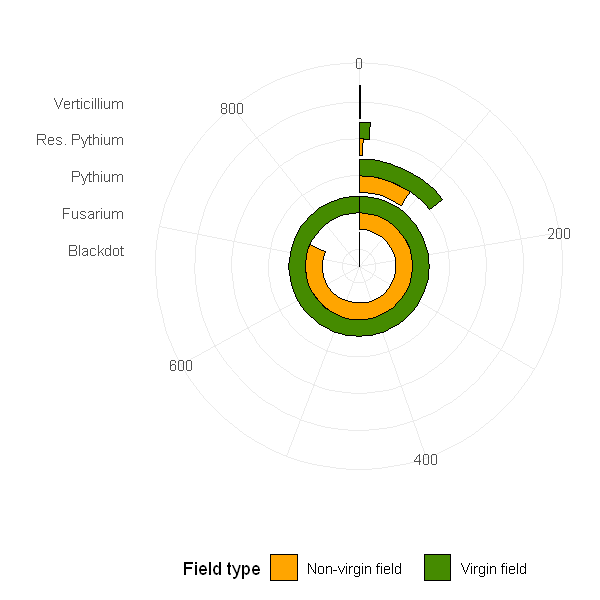

In [49]:
options(repr.plot.width = 5, repr.plot.height = 5)
ggplot(df4, aes(x = pathogen, y = count, fill = FieldType))+
stat_summary(geom = 'bar', fun = mean, position = 'dodge', colour ='black')+
labs(title ='', x = '', y ='')+
theme(axis.ticks = element_blank(),
     axis.title = element_blank(),
     axis.title.y = element_blank())+
coord_polar(theta = 'y')+
#scale_y_sqrt() +
scale_fill_manual(name = 'Field Type', labels = c('Non-virgin field', 'Virgin field'), 
                  values = c('orange', 'chartreuse4'))+
theme_minimal()+
theme(legend.position="bottom")+guides(fill = guide_legend('Field type'))

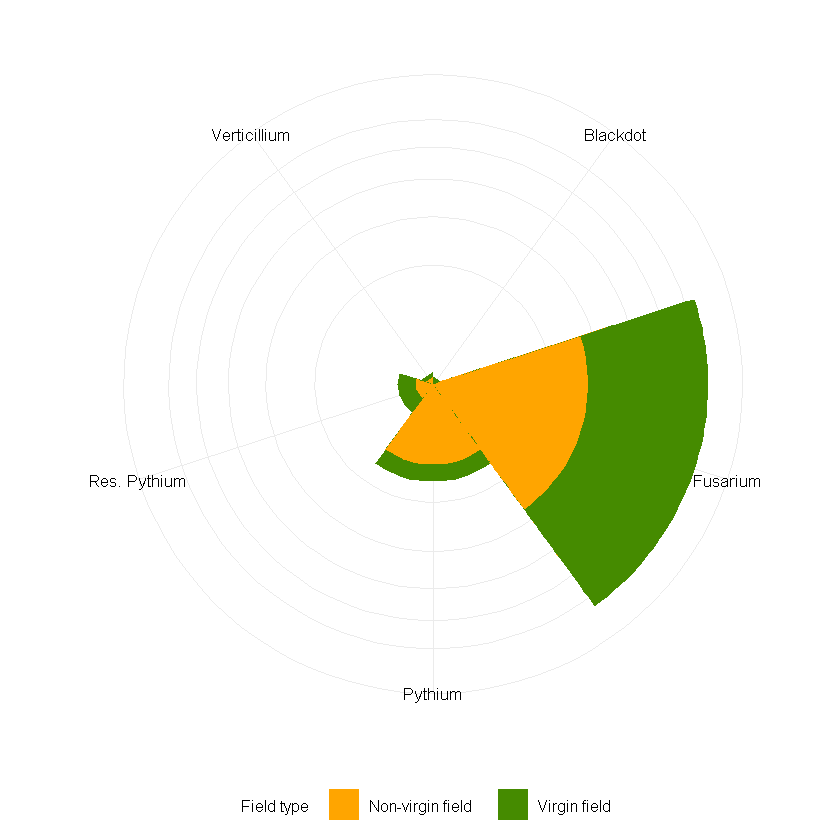

In [50]:
options(repr.plot.width =7, repr.plot.height =7)
ggplot(df4, aes(pathogen, count, fill = FieldType)) + 
  geom_col(position = "identity", width =1) + 
  coord_polar() + 
  scale_fill_manual(values = c('orange', 'chartreuse4')) +
  scale_y_sqrt() +
  theme_minimal()+
   labs(title ='', x = '', y ='')+
    theme(
    axis.ticks = element_blank(),
    axis.text.x = element_text(hjust =0.1, vjust =0.1, size =10,angle =0,color = 'black'),
    axis.text.y = element_blank(),
    legend.text = element_text(size =9.5),
    legend.title = element_text(size =9.5),
    legend.key.size = unit(0.7, 'cm'))+
    theme(legend.position="bottom")+
    guides(fill = guide_legend('Field type'))